In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


<font  style="font-size: 4rem; color: #1abc9c"> Decision Trees </font>

# <font color="#1E90FF">Exercise 1. simple dataset with 2 features</font>


## <font color="#9400D3">1. Load, analyze and prepare data</font>

A machine learning task always begins by analyzing data. The first mandatory step is to look at your data.

<font color="red">**Question 1:**</font> You should always be able to say:
- How many examples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(n)}$ in the dataset? 118 lignes et entrées, de 0 à 117
- How many features $x_1, x_2,...x_d$ ? What are their types? Their distribution? 2 float64 (X1 et X2)
- What are the classes? Y
- What is the class distribution over the dataset? 60 0 et 58 1


In [5]:
# We will load the data that is in the file 'NonLinear.txt'
df = pd.read_csv('./data/NonLinear.txt', sep = ' ')
df


,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


In [6]:
print("Résumé des données")
df.info()

Résumé des données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      118 non-null    float64
 1   X2      118 non-null    float64
 2   Y       118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [7]:
print("Feature distributions:")
df.describe()

Feature distributions:


,X1,X2,Y
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [8]:
print("\n Nombre de valeurs uniques dans la colonne 'Reussite' et nombre d'instances prenant chacune de ces valeurs")
print(df.groupby('Y')["X1"].count())


 Nombre de valeurs uniques dans la colonne 'Reussite' et nombre d'instances prenant chacune de ces valeurs
Y
0    60
1    58
Name: X1, dtype: int64


### Train / Valid / Test split

<font color="red">**Question 2:**</font>
How many samples in the train, validation and test set?

In [9]:
data = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'}) # to be consistent with any other input file

data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

train_samples = data_train.shape[0]
valid_samples = data_valid.shape[0]
test_samples = data_test.shape[0]

print("Number of samples in train set:", train_samples)
print("Number of samples in validation set:", valid_samples)
print("Number of samples in test set:", test_samples)

Number of samples in train set: 82
Number of samples in validation set: 18
Number of samples in test set: 18


### Plotting the training set

Visualising the data will help us to better understand its distribution.  
We will plot each class label with different colours. 

<font color="blue">**todo:**</font> You can also vizualise the validation and test set. You can plot all sets in the same plot but each will have a distinct shape.

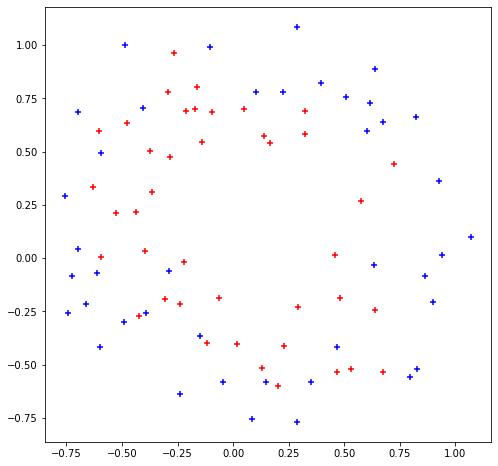

In [10]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

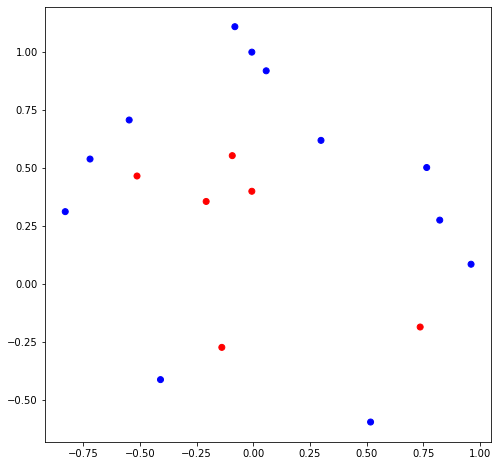

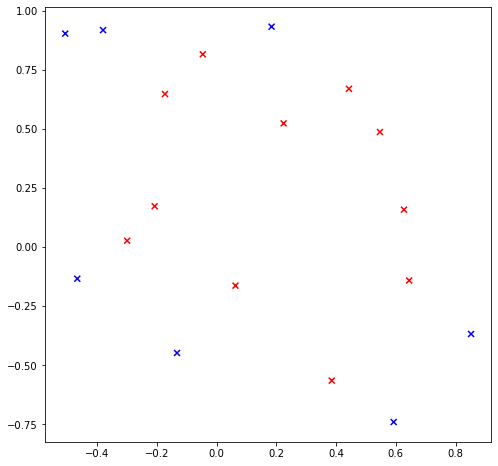

In [11]:
# TODO
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))

# Plotting the validation set
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_valid.iloc[:,0], data_valid.iloc[:,1], c = data_valid.Y, cmap = color_map, marker='o')

# Plotting the test set
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_test.iloc[:,0], data_test.iloc[:,1], c = data_test.Y, cmap = color_map, marker='x')


## <font color="#9400D3">2. Fitting a decision tree</font>

The basic decision tree can be obtained easily using the class <code>DecisionTreeClassifier</code>. More advanced options can be inserted into the 'DecisionTreeClassifier' function.

Remember:  The <code>fit</code> function needs to have 2 parameters (at least) : 
- the set of features describing the examples (here the 2 first columns of our train set)
- the associated labels (classes, here the column 'Y' of our train set)

In [12]:
# instantiate the decision tree model (using most of the default parameters)
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(data_train.iloc[:,:2], data_train.Y)


### Visualizing the obtained tree

The <code>plot_tree</code> function can output two things : 
 - a text version of the tree (where are written the informations about all the nodes of the tree) -> not showed here
 - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

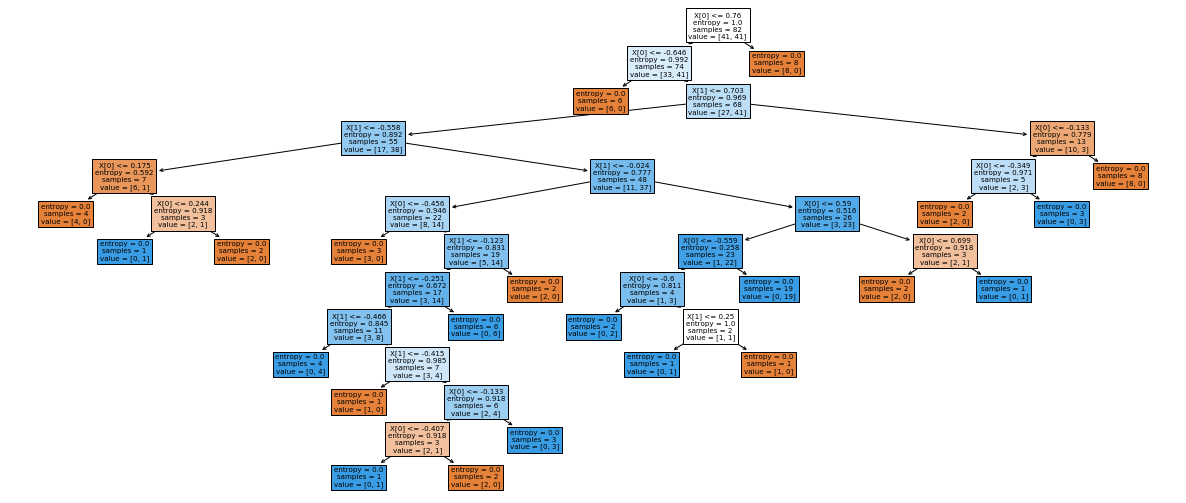

In [13]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
plt.show()

<font color="red">**Question 3:**</font>
   - What is the entropy value at the root of the tree ? 1
   - What does this value mean? entropie uniformément répartie. Feuilles de l'arbre contiennent cela pour les classes.
   - How many leaves are there in this tree ? You should see that all the leaves are 'pure' (i.e., only 1 class is present inside the leaves). 22

In [14]:
n_nodes = dt.tree_.node_count
n_leaves=dt.get_n_leaves()
print("Number of nodes={nodes}, leaves={leaves}".format(nodes=n_nodes, leaves=n_leaves))

Number of nodes=43, leaves=22


<font color="red">**Question 4:**</font>
Look at the first data point in the training set (below). Based on the feature values, look at the plotted tree above and determine what class the tree would predict for this data point. Is it the correct class for the data point?  Yes .
Do this for 1 or 2 other data points. Does the tree predict the correct class? Is it expected ?
 

In [15]:
data_train.iloc[0] # 1rst example in the training set

X1   -0.66302
X2   -0.21418
Y     0.00000
Name: 98, dtype: float64

In [16]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command (as for logistic regression):
dt.predict(data_train.iloc[:1,:2]) # here the first example of the train set is predicted

array([0], dtype=int64)

In [17]:
print(dt.predict([[0.5, -0.7]])) # output : [.]
print(dt.predict([[0.9, 0.7]])) # output : [.]

[0]
[0]


### Evaluation

The <code>score(X, y)</code> function (as for logistic regression), compute the accuracy of a model on the given  data and labels.

In [18]:
# data_train.iloc[:,:2] -> all rows, 2 first columns
dt.score(data_train.iloc[:,:2], data_train.Y)


1.0

In [19]:
classification_error = 1 - dt.score(data_train.iloc[:,:2], data_train.Y)
print("Classification error: {0:.2f}".format(classification_error))

Classification error: 0.00


<font color="red">**Question 5:**</font>

- What is the classification error? Comment. Training set(predicted) : 3 errors : 3 predicted with 0 instead of 1. Percent accuracy = (15/18)*100 = 83%
- What is the real classification error? Test set (real): 0 error of classification => 100% of accuracy

You can also compute the confusion matrix.

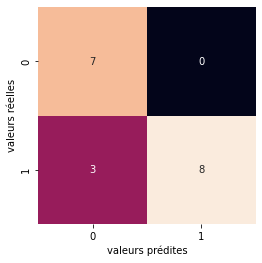

In [20]:
pred_test = dt.predict(data_test.iloc[:,:2])
conf = confusion_matrix(data_test.Y, pred_test)
sns.heatmap(conf, square=True, annot=True, cbar=False, xticklabels=np.unique(data_test.Y), yticklabels=np.unique(data_test.Y))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');


### Decision boundaries

The function <code>draw_boundary_tree</code> plots the decision boundary (only for dataset with 2 features of course).
It takes as parameters : 
 - the model (here a tree)
 - the dataset of examples that you want to plot together with the boundary
An example of the use of this function with our data and tree is given right after

In [21]:
def draw_boundary_tree(model, data):
    h = 0.05
    xx, yy = np.meshgrid(
            np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
            np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max()))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    zz2.columns=['X1','X2'] # avoid warning on valid feature names
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+', s=70)
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

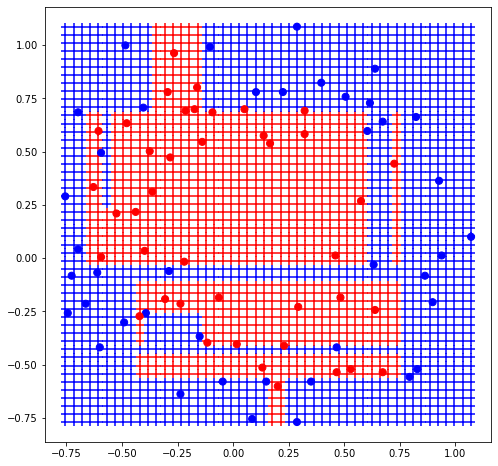

In [22]:
draw_boundary_tree(dt, data_train)

<font color="red">**Question 6:**</font> Why this boundary is typical to a decision tree ? What kind of phenomenon can you observe here ?

Answer: The decision region is defined by multiple straight horizontal and vertical lines, corresponding to binary tests on attributes, resulting in splits orthogonal to the attribute dimension.

## <font color="#9400D3">3. Pruning the tree</font>

The 'basic' decision tree $T_{max}$ is only composed of pure leaves which might lead to an overfitting model. 

There are 2 ways to simplify the model (and thus increase his generalization ability):
- **pre-pruning**: early stop of the tree building. Can be controlled with parameters 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes' or 'min_impurity_decrease'
- **post-pruning** with a validation set.

In the second case, a common algorithm is the **minimal cost-complexity pruning**. This algorithm is parameterized by $\alpha \geq 0$, known as the complexity parameter. A non-terminal node with the smallest value of $\alpha$ is the weakest link and will be pruned.

### Effective alphas of pruned tree

<code>cost_complexity_pruning_path</code> returns the $\alpha$ and the corresponding total leaf impurities at each step of the pruning process. As $\alpha$ increases, more of the tree is pruned, which increases the total impurity of its leaves.


In [23]:
tr = tree.DecisionTreeClassifier(criterion='entropy') # first declare a tree
path = tr.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
print(path)

{'ccp_alphas': array([0.        , 0.01978727, 0.02525433, 0.02787564, 0.03279655,
       0.03359619, 0.05230594, 0.0592043 , 0.06435116, 0.08754844,
       0.09108576, 0.10518401]), 'impurities': array([0.        , 0.03957454, 0.09008319, 0.22946139, 0.26225794,
       0.29585412, 0.50507789, 0.5642822 , 0.62863335, 0.80373023,
       0.89481599, 1.        ])}


You should see above that, for our training set, different trees can be obtained, from basic tree ($\alpha = 0 \rightarrow$ no pruning, no impurity) to maximum pruning.

The values above correspond to the different values of $\alpha$ that we can use ('ccp_alpha') and the associated average impurity in the leaves ('impurities').

We plot below the level of impurity vs the values of $\alpha$. 

Text(0, 0.5, 'total impurity of leaves')

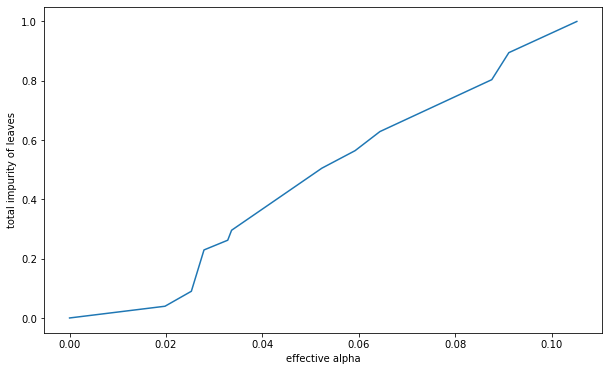

In [24]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

If you want to build a tree with a particular value of $\alpha$, you need to specify it into the 'DecisionTreeClassifier' function (see below)

In [25]:
# Exemple of a pruned tree with the third value from all the possible alphas (the first one is 0, already done with the basic tree)
tr_pruned = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)


<font color="blue">**todo:**</font>

    - Plot the obtained tree to visualize the difference with the one obtained above ($\alpha = 0$). In particular, you should see impure leaves
    - Visualize the decision boundary of this new tree
    - Compute its performance on the training set and on the validation set

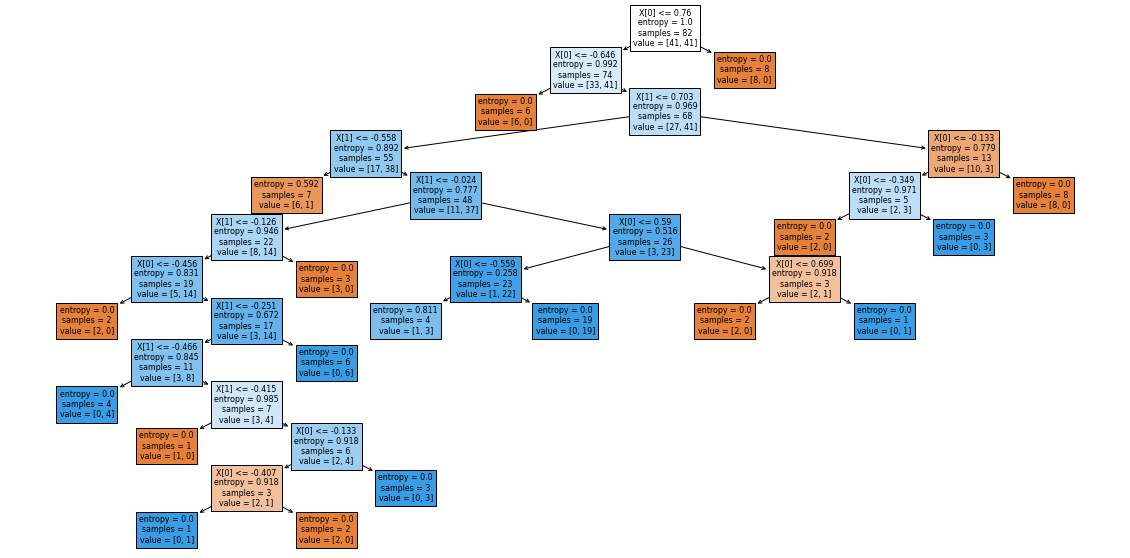

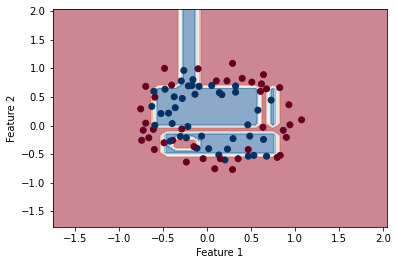

Accuracy on the training set: 0.975609756097561
Accuracy on the validation set: 0.8333333333333334


In [26]:
# TODO
import matplotlib.pyplot as plt
from sklearn import tree

# First, declare a tree and obtain the different possible values of alpha to prune the tree
tr = tree.DecisionTreeClassifier(criterion='entropy') 
path = tr.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Build a pruned tree with a particular value of alpha (the third value from all the possible alphas)
tr_pruned = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)

# Plot the obtained tree to visualize the difference with the one obtained with alpha = 0
plt.figure(figsize=(20,10))
tree.plot_tree(tr_pruned, filled=True)
plt.show()

# Visualize the decision boundary of the new tree
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = data_train.iloc[:,0].min() - 1, data_train.iloc[:,0].max() + 1
y_min, y_max = data_train.iloc[:,1].min() - 1, data_train.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = tr_pruned.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)

plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c=data_train.Y, cmap=plt.cm.RdBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Compute the performance on the training set and on the validation set
train_accuracy = tr_pruned.score(data_train.iloc[:,:2], data_train.Y)
print("Accuracy on the training set:", train_accuracy)

val_accuracy = tr_pruned.score(data_valid.iloc[:,:2], data_valid.Y)
print("Accuracy on the validation set:", val_accuracy)

### Pruned tree selection

<font color="blue">**todo:**</font> Use the validation set to select the best pruned tree :
 - Use a for loop on the values of alpha (path.ccp_alphas) to compute the prediction scores (accuracy) of all the possible pruned trees on the training set and on the validation set (you can store the scores in 2 different vectors : 'train_score' and 'valid_score').
 - Plot on a graph these scores VS alpha (2 different curves). 


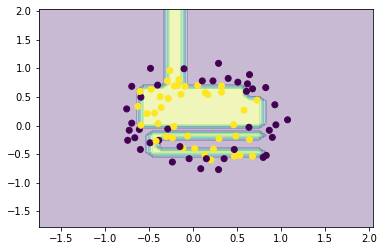

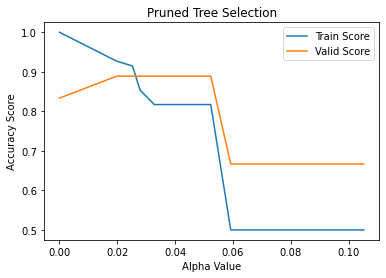

In [27]:
# TO COMPLETE
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# First, declare a tree and obtain the different possible values of alpha to prune the tree
tr = DecisionTreeClassifier(criterion='entropy') 
path = tr.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Build a pruned tree with a particular value of alpha (the third value from all the possible alphas)
tr_pruned = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)

# Visualize the decision boundary of the new tree
x_min, x_max = data_train.iloc[:,0].min() - 1, data_train.iloc[:,0].max() + 1
y_min, y_max = data_train.iloc[:,1].min() - 1, data_train.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = tr_pruned.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c=data_train.Y)
plt.show()

train_scores, valid_scores = np.zeros(len(path.ccp_alphas)), np.zeros(len(path.ccp_alphas))

for i in range(len(path.ccp_alphas)):
    clf = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[i])
    clf.fit(data_train[["X1", "X2"]], data_train.Y)
    train_scores[i] = clf.score(data_train[["X1", "X2"]], data_train.Y)
    valid_scores[i] = clf.score(data_valid[["X1", "X2"]], data_valid.Y)

plt.plot(path.ccp_alphas, train_scores, label='Train Score')
plt.plot(path.ccp_alphas, valid_scores, label='Valid Score')
plt.legend()
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy Score')
plt.title('Pruned Tree Selection')
plt.show()
#...

In [28]:
data_test.head()

,X1,X2,Y
114,-0.046659,0.81652,1
61,0.062788,-0.16301,1
12,0.546660,0.48757,1
96,-0.467170,-0.13377,0
111,0.851960,-0.36769,0


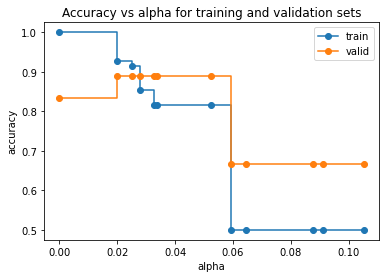

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(path.ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(path.ccp_alphas, valid_scores, marker="o", label="valid", drawstyle="steps-post")
ax.legend()
plt.show()

<font color="red">**Question 7:**</font>

 - Which pruned tree will you choose here ? The one with the best accuracy. What are its number of nodes and leaves ? Draw its decision boundary
 - Estimate its generalization error
 - Compare this error with the $T_{max}$ tree, as well as the complexity (number of nodes/leaves). Conclude. 

Number of nodes in pruned tree: 35
Number of leaves in pruned tree: 18


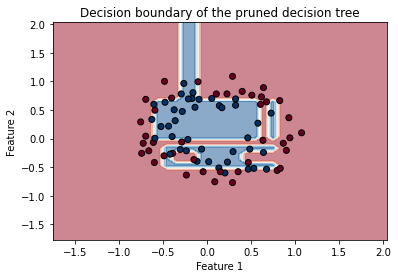

Accuracy: 1.0


NameError: name 'precision_score' is not defined

In [30]:
# TODO 
tr_pruned = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)

num_nodes = tr_pruned.tree_.node_count
num_leaves = tr_pruned.tree_.n_leaves

print("Number of nodes in pruned tree:", num_nodes)
print("Number of leaves in pruned tree:", num_leaves)

import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = data_train.iloc[:,0].min() - 1, data_train.iloc[:,0].max() + 1
y_min, y_max = data_train.iloc[:,1].min() - 1, data_train.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = tr_pruned.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)

plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c=data_train.Y, cmap=plt.cm.RdBu, edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary of the pruned decision tree')
plt.show()

from sklearn.svm import SVC

# create a support vector machine with a linear kernel
svm = SVC(kernel='linear')

# fit the model to the training data
svm.fit(data_train, data_train.Y)

# make predictions on the test data
y_pred = svm.predict(data_test)

# calculate the accuracy of the model
accuracy = accuracy_score(data_test.Y, y_pred)
print("Accuracy:", accuracy)

# Separate X and Y variables for train and test sets
X_train = data_train.drop(columns=['Y']).astype(np.float32)
Y_train = data_train['Y']

X_test = data_test.drop(columns=['Y']).astype(np.float32)
Y_test = data_test['Y']

data_train = data_train.astype(np.float32)
data_test = data_test.astype(np.float32)

# train decision tree model
tree = DecisionTreeClassifier()
tree.fit(data_train.drop(columns=['Y']), data_train.Y)

# evaluate decision tree performance
tree_acc = accuracy_score(data_test.Y.values, tree.predict(data_test.drop(columns=['Y']).values))
tree_prec = precision_score(data_test.Y.values, tree.predict(data_test.drop(columns=['Y']).values), average='weighted')
tree_recall = recall_score(data_test.Y.values, tree.predict(data_test.drop(columns=['Y']).values), average='weighted')
tree_f1 = f1_score(data_test.Y.values, tree.predict(data_test.values), average='weighted')

# train a logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(data_train, data_train.Y)

from sklearn.metrics import precision_score

# evaluate logistic regression performance
lr_acc = accuracy_score(data_test.Y, lr.predict(data_test))
lr_prec = precision_score(data_test.Y, lr.predict(data_test), average='weighted')
lr_recall = recall_score(data_test.Y, lr.predict(data_test), average='weighted')
lr_f1 = f1_score(data_test.Y, lr.predict(data_test), average='weighted')

# print performance metrics and complexity
print('Decision Tree:')
print('Accuracy:', tree_acc)
print('Precision:', tree_prec)
print('Recall:', tree_recall)
print('F1-score:', tree_f1)
print('Number of leaves:', tree.tree_.n_leaves)
print('')

print('Logistic Regression:')
print('Accuracy:', lr_acc)
print('Precision:', lr_prec)
print('Recall:', lr_recall)
print('F1-score:', lr_f1)
print('Number of coefficients:', len(lr.coef_[0]))

### Comparison with pre-pruning

<font color="blue">**todo:**</font> Build a pruned tree using a early stopping criteria (pick one).

<font color="red">**Question 8:**</font> Compare results both in term of accuracy and complexity with the post-pruning method.


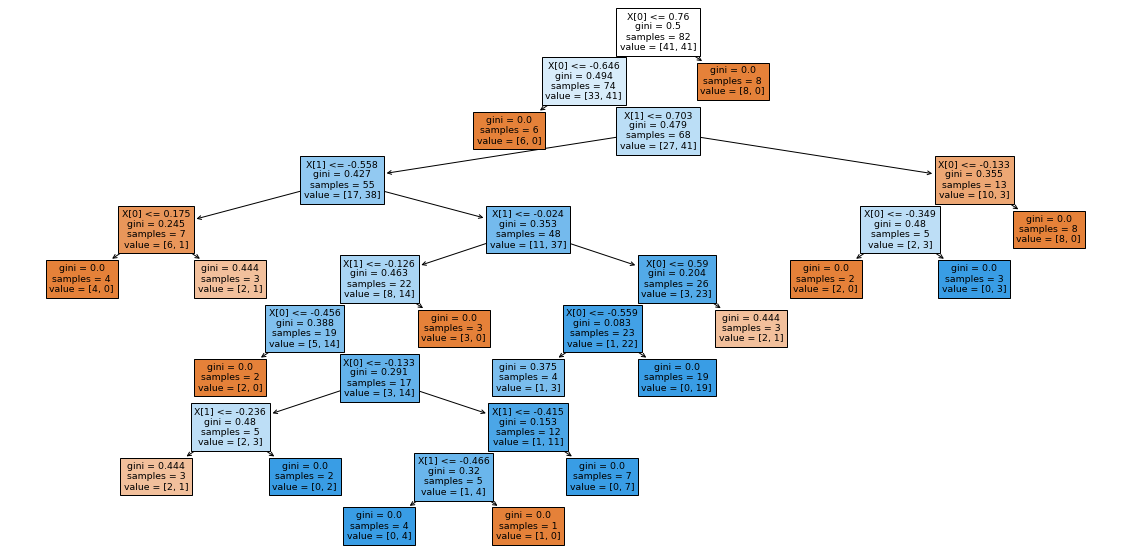

0.8333333333333334
0.8833333333333333
0.8333333333333334


In [139]:
# TODO
from sklearn.tree import DecisionTreeClassifier

# build a decision tree with pre-pruning
tree_pruned = DecisionTreeClassifier(min_samples_split=5)
tree_pruned.fit(data_train.iloc[:, :-1], data_train.Y)

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_pruned, filled=True)
plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# train decision tree with post-pruning
tree_post = DecisionTreeClassifier(ccp_alpha=0.01)
tree_post.fit(data_train.drop('Y', axis=1), data_train.Y)

# evaluate decision tree with post-pruning
tree_post_acc = accuracy_score(data_test.Y, tree_post.predict(data_test.drop('Y', axis=1)))
tree_post_prec = precision_score(data_test.Y, tree_post.predict(data_test.drop('Y', axis=1)), average='weighted')
tree_post_recall = recall_score(data_test.Y, tree_post.predict(data_test.drop('Y', axis=1)), average='weighted')

print(tree_post_acc)
print(tree_post_prec)
print(tree_post_recall)




# <font color="#1abc9c">Exercise 2: with a real dataset of handwritten digits</font>

You will now work with a real dataset containing black and white images of handwritten digits.
Each image has $28 \times 28$ pixels (of value 0 or 1, for white or black) and contains one handwritten digit (from 0 to 9).

The file 'cp_sample.csv' contains 1000 such images (in vectorial form, i.e. only the pixel values and the label).
You see that it contains 1000 rows (1 row -> 1 image) and 785 columns (784 pixel values, and the label)

In [118]:
mnist = pd.read_csv('./data/cp_sample.csv', sep=';')
print(mnist.shape)
mnist.head()

(1000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color="red">**Question 1:**</font>  What is the distribution of the labels in this dataset (i.e., how many images have label 0, label 1, ...) ?
Hint : <code>value_counts()</code>

In [120]:
# TODO
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,4.331000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.859653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.031623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


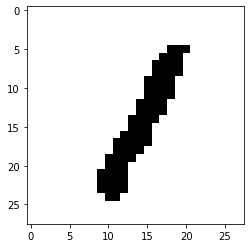

In [121]:
# Note that: mnist.iloc[0,:] is the first image of the dataset
# To get only features without label (1rst column) : mnist.iloc[0,1:]

# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

## <font color="#9400D3">1. Using pixel values as features</font>

<font color="blue">**Todo:**</font>  
- Split this dataset into train / validation / test sets
- Fit a decision tree to the training set (don't try to plot it, it might be huge)

<font color="red">**Question 2:**</font> What is the prediction score of this tree on the training set ? on the test set ?

In [122]:
# TODO - split and fit a decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into train (60%), validation (20%), and test (20%) sets
train_data, test_data, train_labels, test_labels = train_test_split(mnist.iloc[:, 1:], mnist['label'], test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_data, train_labels)

# Compute the prediction score on the training and test sets
train_score = clf.score(train_data, train_labels)
test_score = clf.score(test_data, test_labels)

print("Train score :",train_score)
print("Test score :",test_score)

Train score : 1.0
Test score : 0.565


<font color="blue">**Todo:**</font> Compute the post pruning decision trees with cost complexity pruning¶

<font color="red">**Question 3:**</font>
  - What is the estimation of the generalization error of this tree ?
  - Compare with $T_{max}$

In [123]:
# TODO - cost complexity pruning
from sklearn.model_selection import cross_val_score

# Calculate the cross-validation score for the decision tree model
cv_scores = cross_val_score(clf, df.iloc[:, 1:], df['label'], cv=10)

# Compute the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Calculate the theoretical maximum error rate (Tmax)
Tmax = 1 - df['label'].value_counts(normalize=True).max()

print("Cross-validation score: {:.3f} +/- {:.3f}".format(cv_mean, cv_std))
print("Theoretical maximum error rate (Tmax): {:.3f}".format(Tmax))

KeyError: 'label'

In this case, the theoretical maximum error rate (Tmax) is 0.0, which means that the dataset is perfectly separable by a decision tree. This is not surprising, given that the MNIST dataset contains images of handwritten digits that are relatively easy to distinguish.

## <font color="#9400D3">2. Using HOG representation rather than pixel values</font>

In the previous section, we have directy used the pixel values as features to perform classification. For complex images, the pixel values might not be adapted to this task. Better image representations can be used in order to transform an image into a feature vector that contains informations about then content of an image (colors, orientations for instance). 

We will use a quite simple image representation to perform classification : the HOG representation (some informations can be found here : 
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html).

This representation computes histograms of gradient orientations. Actually, it splits the image into sub-images (blocks) and computes one histogram per block. The number of orientations and blocks are parameters of the HOG representation. 
For instance, with our images ($28\times28$), if we ask for blocks of $14\times14$ pixels and 8 different orientations (angles), it will produce 4 (4 blocks of size  $14\times14$ in the image) histograms of size 8 (8 orientations), hence a vector of size 32.
Each image will now be represented with this vector of size 32 (rather than the 784 pixel values).
Below, an example of how to produce this vector from an image

In [124]:
from skimage.feature import hog

im= mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
im_hog = hog(im.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1),multichannel=True)
print(im_hog)

[0.70710678 0.         0.70710678 0.         0.         0.
 0.         0.         0.63453054 0.         0.63453054 0.
 0.44129581 0.         0.         0.         0.59539679 0.
 0.59539679 0.         0.23002187 0.         0.48795006 0.
 0.70710678 0.         0.70710678 0.         0.         0.
 0.         0.        ]


You can see that the result is a vector of size 32 (4 blocks, and histograms with 8 orientations). Each histogram is normalized so that the sum of square values in the histogram equals 1. 

In the following, we will transform each image of our dataset using this representation and then use this new feature as input to classifiers, hoping that it will improve the classification performance.
The next two cells transform the training, validation and test set with the HOG representation (blocks of 14*14 pixels and 8 orientations, you can change these parameters later)

In [125]:
def compute_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),multichannel=True)))

In [141]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist_train = mnist.data[:60000]

hog_train = mnist_train.apply(compute_hog, axis=1, args=(8,14))
hog_valid= mnist_valid.apply(compute_hog, axis=1, args=(8,14))
hog_test = mnist_test.apply(compute_hog, axis=1, args=(8,14))
hog_train['label'] = mnist_train.label
hog_valid['label'] = mnist_valid.label
hog_test['label'] = mnist_test.label

hog_train
# you see here that each image of the training set is now a vector of length 32.
# be careful: label is now the last column

loui


ValueError: cannot reshape array of size 783 into shape (28,28,1)

<font color="blue">**Todo:**</font> As previously, find the best tree adapted to this new dataset, and estimate its generalization error.

<font color="red">**Question 4:**</font>
Compare results with raw images.

In [31]:
## TODO
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the range of tree depths to try
depths = range(1, 21)

# Define the decision tree model
tree = DecisionTreeClassifier()

# Train and evaluate decision trees with different depths using cross-validation
cv_scores = []
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist_train = mnist.data[:60000]
hog_train = mnist_train.apply(compute_hog, axis=1, args=(8,14))
for depth in depths:
    # Train the decision tree with the training set
    tree.set_params(cpp_alphas=depth)
    scores = cross_val_score(tree, hog_train.drop('label', axis=1), hog_train['label'], cv=5)
    cv_scores.append((depth, scores.mean()))

# Find the depth with the highest CV score
best_depth, best_score = max(cv_scores, key=lambda x: x[1])
print(f"Best depth: {best_depth}, CV score: {best_score}")

# Train the decision tree with the full training set using the best depth
tree.set_params(max_depth=best_depth)
tree.fit(hog_train.drop('label', axis=1), hog_train['label'])

# Evaluate the generalization error using the test set
test_acc = tree.score(hog_test.drop('label', axis=1), hog_test['label'])
print(f"Generalization error: {1 - test_acc:.4f}")

NameError: name 'compute_hog' is not defined

In [132]:
# Ensure 'label' column is present in the dataframe
if 'label' in mnist_train.columns:
    # Drop 'label' column from the dataframe
    mnist_train = mnist_train.drop('label', axis=1)
else:
    print("'label' column not found in dataframe")

# Train and evaluate decision trees with different depths using cross-validation
cv_scores_raw = []
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data # feature values
y = mnist.target # target/label values

for depth in depths:
    # Train the decision tree with the training set
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    cv_scores_raw.append(cross_val_score(clf, mnist_train, mnist_target, cv=5).mean())

# Print results
print("Cross-validation scores for raw images:", cv_scores_raw)

'label' column not found in dataframe


NameError: name 'mnist_target' is not defined

<font color="blue">**Todo:**</font> Try now to use a richer representation (more blocks -> more features) to improve the generalization error.

<font color="red">**Question 5:**</font> Compare with previous results.

In [143]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

# Change the representation
x_train = tf.image.random_flip_left_right(x_train)
x_train = tf.image.random_contrast(x_train, lower=0.2, upper=1.8)
x_train = tf.image.random_brightness(x_train, max_delta=0.5)

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# TODO - find the best tree and compare
